In [1]:
import multiprocessing

import numpy as np
import matplotlib.pyplot as plt

import cnn
import utils
import hmm

Using TensorFlow backend.


In [2]:
cpus = multiprocessing.cpu_count() // 2
print(f'CPUs: {cpus}')
cpus = 2

CPUs: 8


In [3]:
x = 3
y = np.array(['a', 'b', 'c'])
s = np.zeros(x)
s[0] = 1.0

real_hmm_rand = hmm.random_hmm(
    x=x,
    y=''.join(y),
    s=s
)

print(f'real_hmm_rand A:\n{real_hmm_rand.a}\n')
print(f'real_hmm_rand B:\n{real_hmm_rand.b}')

real_hmm_rand A:
[[0.17986119 0.07716443 0.74297438]
 [0.87309585 0.08317451 0.04372964]
 [0.18144045 0.6056494  0.21291015]]

real_hmm_rand B:
[[0.04796996 0.75300694 0.1990231 ]
 [0.11700789 0.01109407 0.87189804]
 [0.4658762  0.32871359 0.20541021]]


In [4]:
epoch_size = 100
batch_size = 100
seq_len = 20

rand_data_gen = utils.HMMDataGenerator(
    real_hmm_rand,
    epoch_size,
    batch_size,
    seq_len
)

In [5]:
t_hmm = real_hmm_rand
t_gen = rand_data_gen

## CNN 1

In [6]:
model = cnn.CNNModel(t_gen.input_shape())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_1 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_3 (Activation)    (None, 1)                

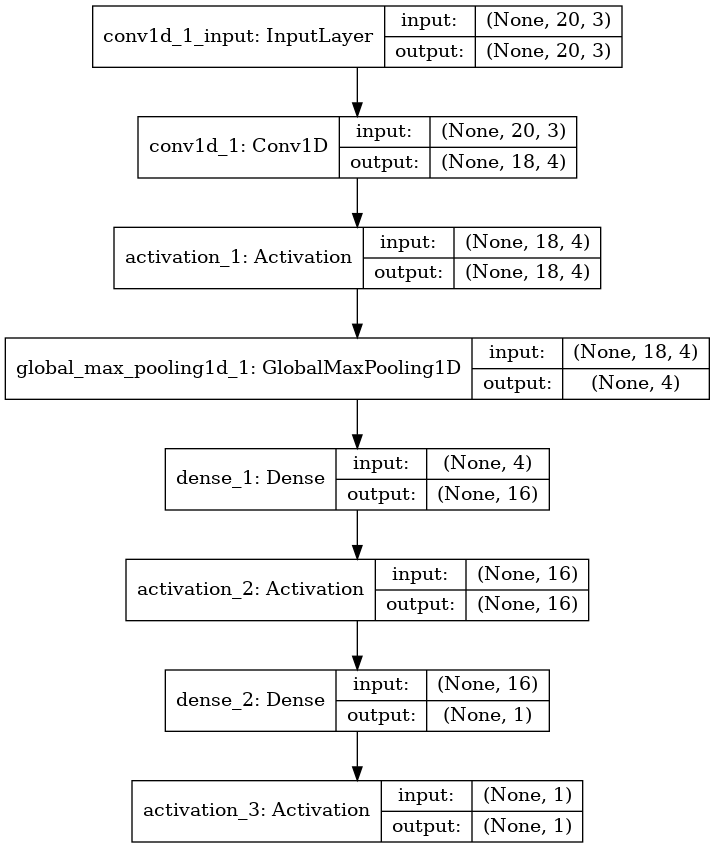

In [7]:
utils.plot_model(model, 'images/cnn1_arch.png')

In [8]:
epochs = 20

history = model.fit_generator(
    generator=t_gen,
    epochs=epochs,
    callbacks=utils.callbacks('cnn1'),
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 5s 46ms/step - loss: 0.6841 - accuracy: 0.6027
Epoch 2/20
100/100 [==============================] - 3s 33ms/step - loss: 0.6596 - accuracy: 0.6671
Epoch 3/20
100/100 [==============================] - 3s 33ms/step - loss: 0.6292 - accuracy: 0.6746
Epoch 4/20
100/100 [==============================] - 3s 33ms/step - loss: 0.6024 - accuracy: 0.6772
Epoch 5/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5808 - accuracy: 0.6927
Epoch 6/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5603 - accuracy: 0.7140
Epoch 7/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5416 - accuracy: 0.7256
Epoch 8/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5282 - accuracy: 0.7380
Epoch 9/20
100/100 [==============================] - 3s 34ms/step - loss: 0.5191 - accuracy: 0.7406
Epoch 10/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5142 - accura

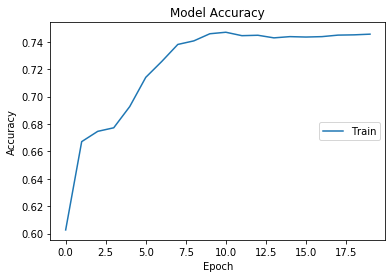

In [9]:
utils.plot_acc(history, 'images/cnn1_acc.png')

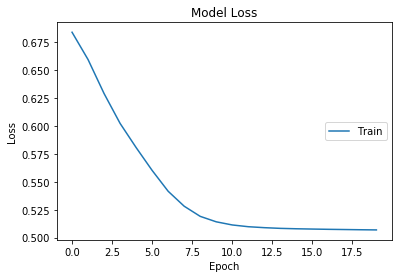

In [10]:
utils.plot_loss(history, 'images/cnn1_loss.png')

In [11]:
test_X = t_hmm.simulate(seq_len, reset_before=True)[1]
print(test_X)
test_X = np.array([t_gen._encode_hmm_outputs(test_X)])
print(test_X)

['b' 'b' 'b' 'a' 'c' 'a' 'b' 'c' 'c' 'a' 'b' 'a' 'a' 'c' 'c' 'a' 'c' 'b'
 'b' 'b']
[[[0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [1. 0. 0.]
  [0. 1. 0.]
  [1. 0. 0.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]
  [1. 0. 0.]
  [0. 0. 1.]
  [0. 1. 0.]
  [0. 1. 0.]
  [0. 1. 0.]]]


In [12]:
p = model.predict(test_X)
print(p)

[[0.36601436]]


In [13]:
pred_real = bool(round(p[0][0]))
print(f'Predict - Real?: {pred_real}')

Predict - Real?: False


In [14]:
model2 = cnn.CNNModel2(t_gen.input_shape())
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 18, 4)             40        
_________________________________________________________________
activation_4 (Activation)    (None, 18, 4)             0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 9, 4)              0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 7, 8)              104       
_________________________________________________________________
activation_5 (Activation)    (None, 7, 8)              0         
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)               

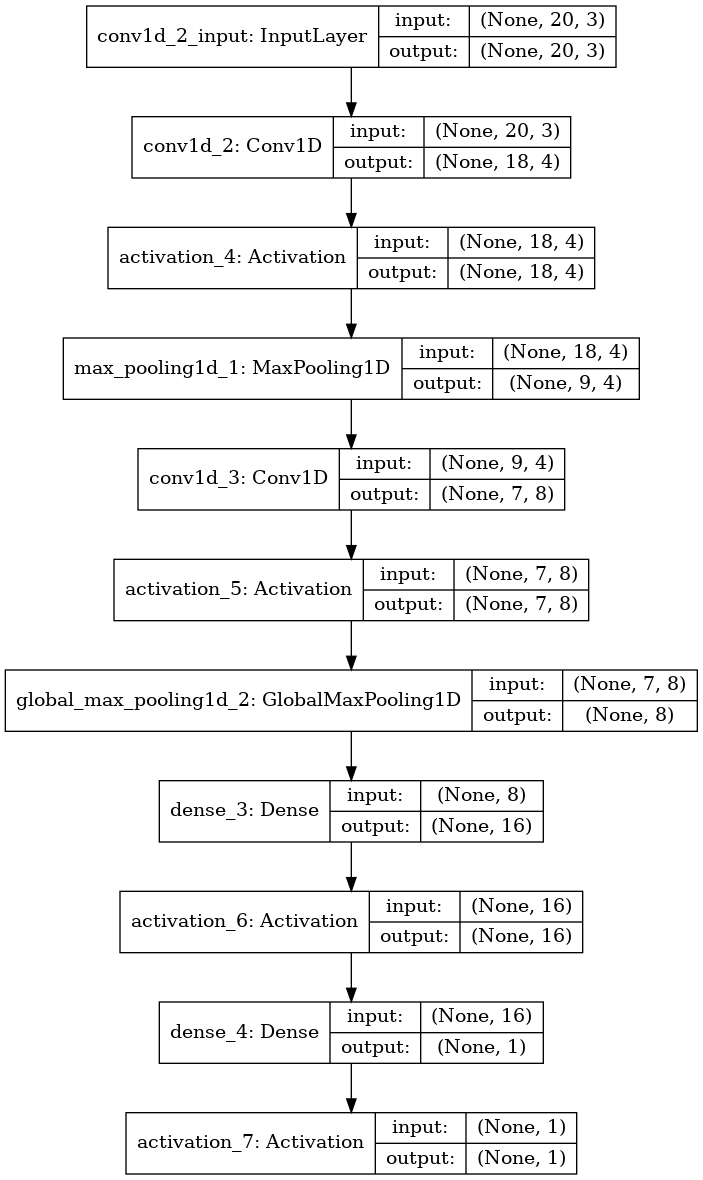

In [15]:
utils.plot_model(model2, to_file='images/cnn2_arch.png')

In [16]:
epochs = 20

history2 = model2.fit_generator(
    generator=t_gen,
    epochs=epochs,
    callbacks=utils.callbacks('cnn2'),
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 3s 34ms/step - loss: 0.6618 - accuracy: 0.6040
Epoch 2/20
100/100 [==============================] - 3s 34ms/step - loss: 0.5915 - accuracy: 0.7021
Epoch 3/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5458 - accuracy: 0.7181
Epoch 4/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5245 - accuracy: 0.7326
Epoch 5/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5085 - accuracy: 0.7435
Epoch 6/20
100/100 [==============================] - 3s 34ms/step - loss: 0.4963 - accuracy: 0.7550
Epoch 7/20
100/100 [==============================] - 3s 33ms/step - loss: 0.4858 - accuracy: 0.7640
Epoch 8/20
100/100 [==============================] - 3s 34ms/step - loss: 0.4783 - accuracy: 0.7680
Epoch 9/20
100/100 [==============================] - 3s 33ms/step - loss: 0.4725 - accuracy: 0.7710
Epoch 10/20
100/100 [==============================] - 3s 33ms/step - loss: 0.4683 - accura

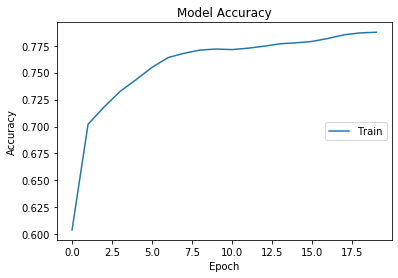

In [17]:
utils.plot_acc(history2, 'images/cnn2_acc.png')

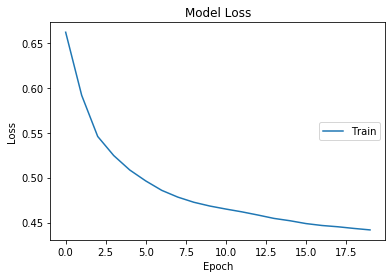

In [18]:
utils.plot_loss(history2, 'images/cnn2_loss.png')

# Model 3

In [19]:
model3 = cnn.CNNModel3(t_gen.input_shape())
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 18, 32)            320       
_________________________________________________________________
activation_8 (Activation)    (None, 18, 32)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 9, 32)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 7, 64)             6208      
_________________________________________________________________
activation_9 (Activation)    (None, 7, 64)             0         
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

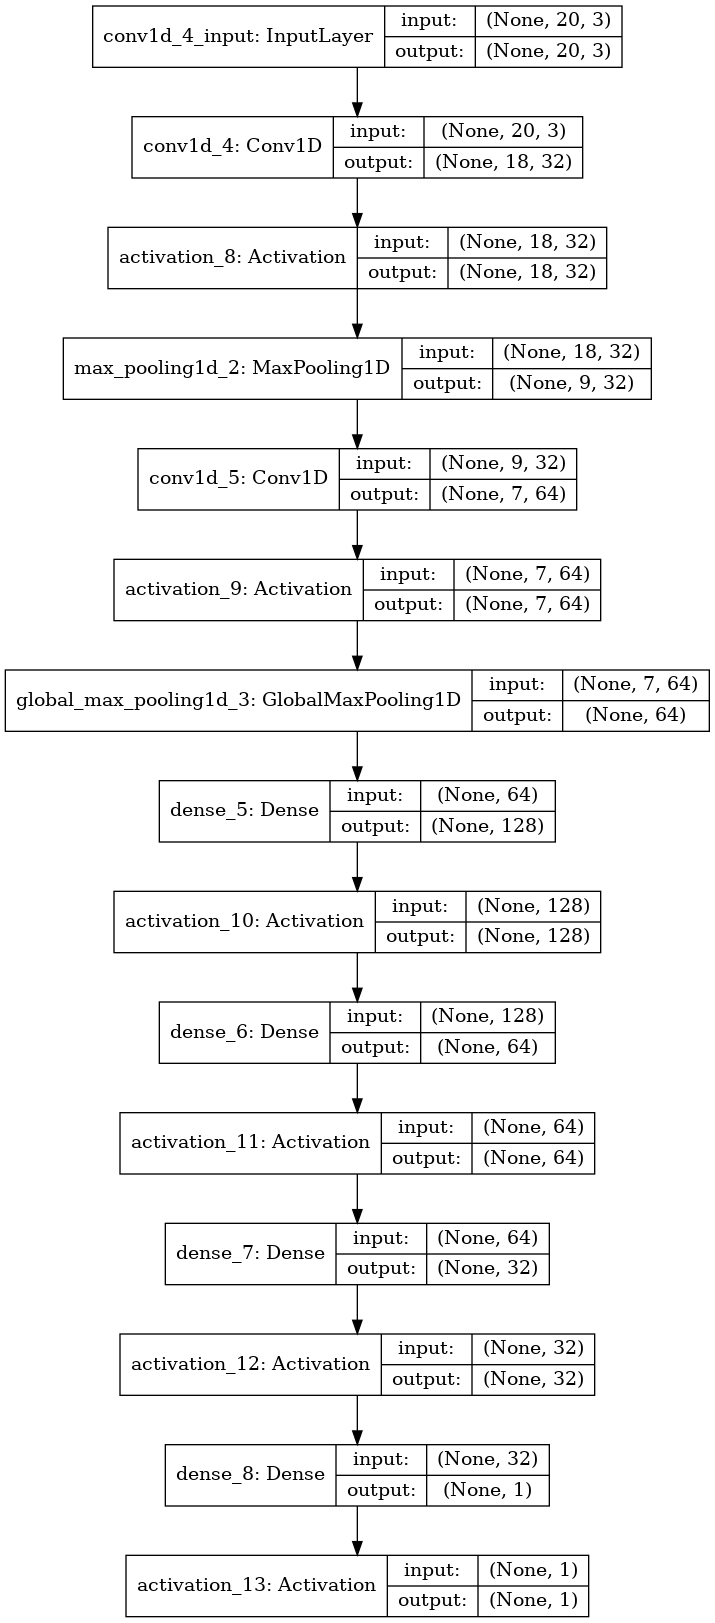

In [20]:
utils.plot_model(model3, 'images/cnn3_arch.png')

In [21]:
epochs = 20

history3 = model3.fit_generator(
    generator=t_gen,
    epochs=epochs,
    callbacks=utils.callbacks('cnn3'),
#     validation_data=v_gen,
    use_multiprocessing=True,
    workers=cpus
)

Epoch 1/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5959 - accuracy: 0.7142
Epoch 2/20
100/100 [==============================] - 3s 33ms/step - loss: 0.5034 - accuracy: 0.7541
Epoch 3/20
100/100 [==============================] - 3s 33ms/step - loss: 0.4645 - accuracy: 0.7768
Epoch 4/20
100/100 [==============================] - 3s 34ms/step - loss: 0.4483 - accuracy: 0.7829
Epoch 5/20
100/100 [==============================] - 3s 34ms/step - loss: 0.4346 - accuracy: 0.7948
Epoch 6/20
100/100 [==============================] - 3s 34ms/step - loss: 0.4225 - accuracy: 0.8057
Epoch 7/20
100/100 [==============================] - 3s 33ms/step - loss: 0.4121 - accuracy: 0.8117
Epoch 8/20
100/100 [==============================] - 3s 34ms/step - loss: 0.4027 - accuracy: 0.8176
Epoch 9/20
100/100 [==============================] - 3s 33ms/step - loss: 0.3959 - accuracy: 0.8225
Epoch 10/20
100/100 [==============================] - 3s 33ms/step - loss: 0.3880 - accura

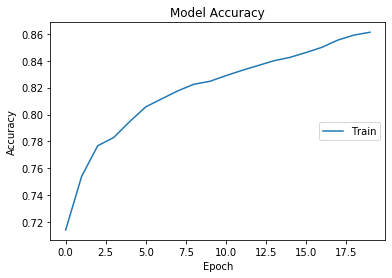

In [22]:
utils.plot_acc(history3, 'images/cnn3_acc.png')

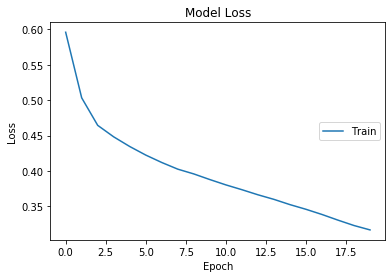

In [23]:
utils.plot_loss(history3, 'images/cnn3_loss.png')